In [1]:
# Relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Load the Preprocessed Data

In [3]:
# To avail the classes notebook
%run Phase_3_Project_Classes.ipynb 

# Path to the folder where the data is saved
output_path = "Preprocessed Data/"

# Load the datasets needed for modeling
X_train_scaled = pd.read_csv(output_path + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(output_path + 'X_test_scaled.csv')
y_train = pd.read_csv(output_path + 'y_train.csv')
y_test = pd.read_csv(output_path + 'y_test.csv')

# Verify that the data has been loaded correctly
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train_scaled shape: (46008, 16)
X_test_scaled shape: (10642, 16)
y_train shape: (46008, 1)
y_test shape: (10642, 1)


In [5]:
# Check class distribution in training set
print(y_train.value_counts())


Status_Group
0.0             23004
1.0             23004
Name: count, dtype: int64


# Modelling

## Model 1: Logistic Regression: Baseline Model
The Logistic Regression model is implemented as a baseline to establish a point of comparison for evaluating other models. It uses the default configuration with standard hyperparameters. It serves as a starting point without applying advanced tuning or feature engineering, providing a benchmark for model performance

In [7]:
# Initialize the model
trainer = ModelTrainer(X_train_scaled, y_train, X_test_scaled, y_test)


# Train the models
logistic_model = trainer.logistic_regression()

## Model 2. Cross-validated Untuned Decision Tree Classifier
The untuned Decision Tree Classifier is trained using the training dataset without any hyperparameter optimization.
The model is cross-validated during training to evaluate its performance on multiple subsets of the data. This serves as a foundation for later the comparison with a tuned decision tree classifier.

In [9]:
# Train the models
untuned_dt_model = trainer.untuned_decision_tree()

## Model 3 : Tuned and Cross Validated Decsion Tree Classifier
This model leverages hyperparameter tuning and cross-validation to optimize the Decision Tree Classifier's performance. It uses GridSearchCV to systematically explore combinations of hyperparameters 

In [11]:
# Train the models
tuned_dt_model = trainer.tuned_decision_tree()

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


# Model Evaluations

## Model 1: Logistic Regression

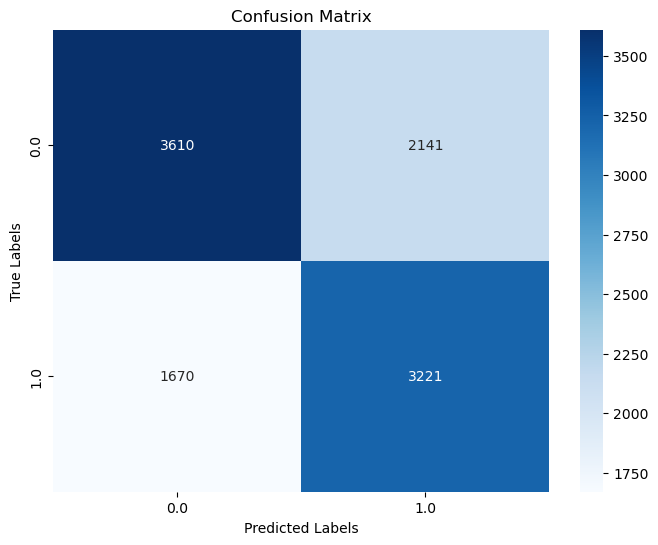

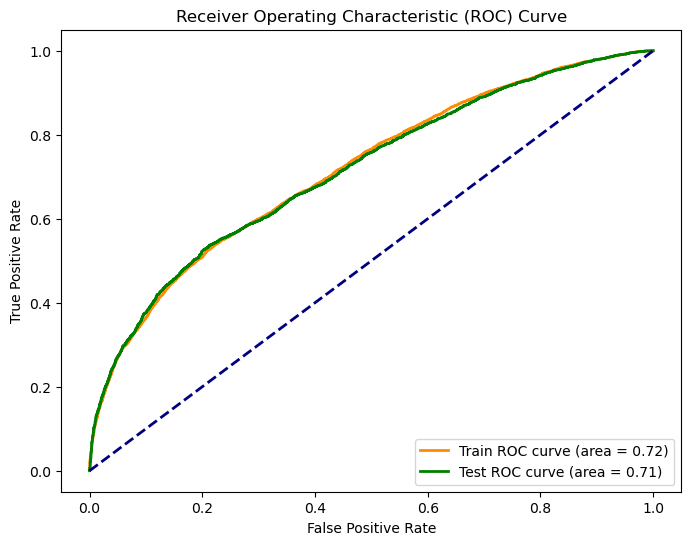

Logistic Regression Evaluation:
{'train_accuracy': 0.6445618153364632, 'test_accuracy': 0.6418906220635219, 'train_precision': 0.6403697606686083, 'test_precision': 0.6007086907870197, 'train_recall': 0.6594940010432968, 'test_recall': 0.6585565324064608, 'train_f1': 0.6497911982010922, 'test_f1': 0.6283039110504243, 'train_conf_matrix': array([[14484,  8520],
       [ 7833, 15171]], dtype=int64), 'test_conf_matrix': array([[3610, 2141],
       [1670, 3221]], dtype=int64), 'train_report_summary': {'precision_0': 0.6490119639736524, 'precision_1': 0.6403697606686083, 'recall_0': 0.6296296296296297, 'recall_1': 0.6594940010432968, 'f1_0': 0.6391738928973324, 'f1_1': 0.6497911982010922, 'accuracy': 0.6445618153364632}, 'test_report_summary': {'precision_0': 0.6837121212121212, 'precision_1': 0.6007086907870197, 'recall_0': 0.627716918796731, 'recall_1': 0.6585565324064608, 'f1_0': 0.654519082585441, 'f1_1': 0.6283039110504243, 'accuracy': 0.6418906220635219}}


In [13]:
# Initialize the evaluator
evaluator = ModelEvaluator(X_train_scaled, y_train, X_test_scaled, y_test)

# Train the models
logistic_model = trainer.logistic_regression()


# Evaluate the models
logistic_results = evaluator.evaluate(logistic_model)

# Print evaluation results
print("Logistic Regression Evaluation:")
print(logistic_results)

Training Accuracy: 64.46%
Functional Wells (0): Precision 64%, Recall 63%.
Wells Needing Repair (1): Precision 64%, Recall 66%.
Misclassification rate: ~35%.

Test Accuracy: 64.19%
Functional Wells (0): Precision 68%, Recall 63%.
Wells Needing Repair (1): Precision 60%, Recall 66%.
Misclassification rate: ~36%.

##### Insights:

The model performs slightly better in identifying functional wells (0) than those needing repair (1), with higher precision for class 0. Performance is fairly consistent across both training and test data, indicating minimal overfitting. However, precision for wells needing repair (1) drops on the test data, suggesting room for improvement. Optimizing the model, perhaps through feature tuning or regularization, could lead to more accurate predictions for wells needing repair.

## Model 2. Cross-validated Untuned Decision Tree Classifier

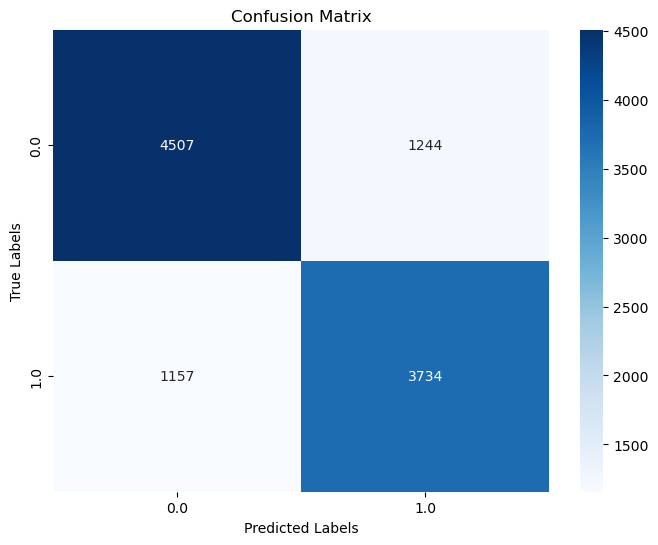

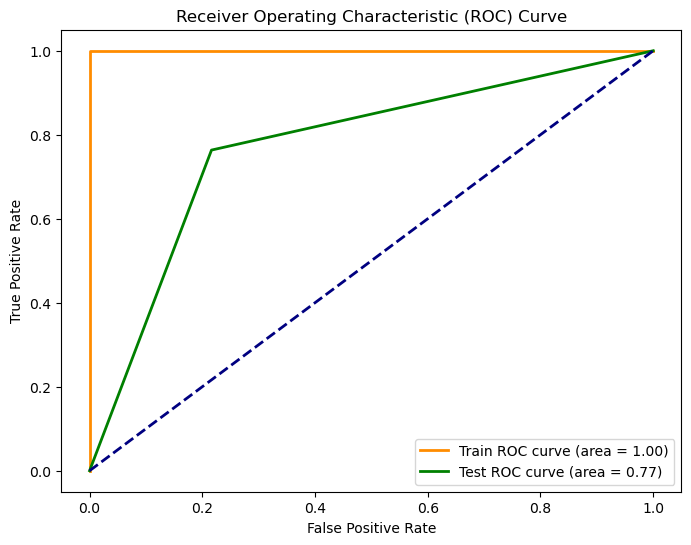


Untuned Decision Tree Evaluation:
{'train_accuracy': 1.0, 'test_accuracy': 0.7743845141890622, 'train_precision': 1.0, 'test_precision': 0.750100441944556, 'train_recall': 1.0, 'test_recall': 0.7634430586792067, 'train_f1': 1.0, 'test_f1': 0.7567129395075489, 'train_conf_matrix': array([[23004,     0],
       [    0, 23004]], dtype=int64), 'test_conf_matrix': array([[4507, 1244],
       [1157, 3734]], dtype=int64), 'train_report_summary': {'precision_0': 1.0, 'precision_1': 1.0, 'recall_0': 1.0, 'recall_1': 1.0, 'f1_0': 1.0, 'f1_1': 1.0, 'accuracy': 1.0}, 'test_report_summary': {'precision_0': 0.7957274011299436, 'precision_1': 0.750100441944556, 'recall_0': 0.7836897930794644, 'recall_1': 0.7634430586792067, 'f1_0': 0.7896627244853264, 'f1_1': 0.7567129395075489, 'accuracy': 0.7743845141890622}}


In [15]:
# Train the models
untuned_dt_model = trainer.untuned_decision_tree()

# Evaluate the models
untuned_dt_results = evaluator.evaluate(untuned_dt_model)

# Print evaluation results
print("\nUntuned Decision Tree Evaluation:")
print(untuned_dt_results)



Training Accuracy: 100%
Functional Wells (0): Precision 100%, Recall 100%.
Wells Needing Repair (1): Precision 100%, Recall 100%.
Misclassification rate: 0%.

Test Accuracy: 77.44%
Functional Wells (0): Precision 80%, Recall 78%.
Wells Needing Repair (1): Precision 75%, Recall 76%.
Misclassification rate: ~23%.

#### Insights:

The untuned decision tree model achieves perfect performance on the training data, with 100% precision and recall for both classes. However, there is a notable drop in performance on the test data, with accuracy at 77.44%, which indicates that the model has overfitted to the training data. It performs better at identifying functional wells (0) with higher precision and recall compared to wells needing repair (1), where performance is slightly lower. Further model tuning, such as adjusting hyperparameters or implementing regularization, would likely improve the generalization ability and balance the precision and recall across both classes.

## Model 3 : Tuned and Cross Validated Decsion Tree Classifier

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


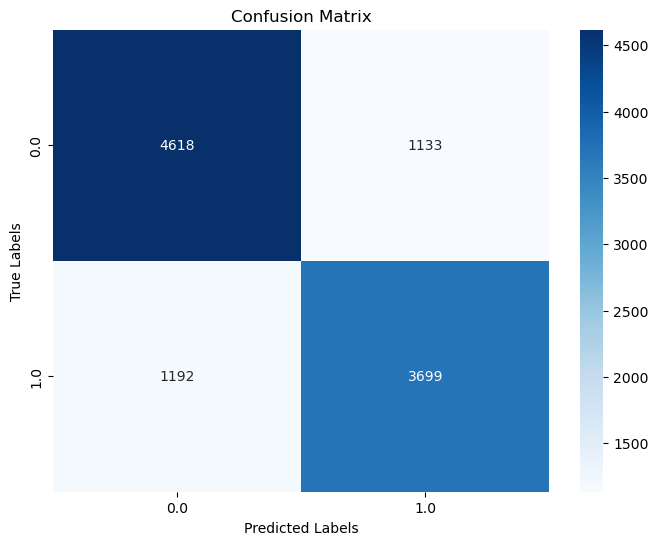

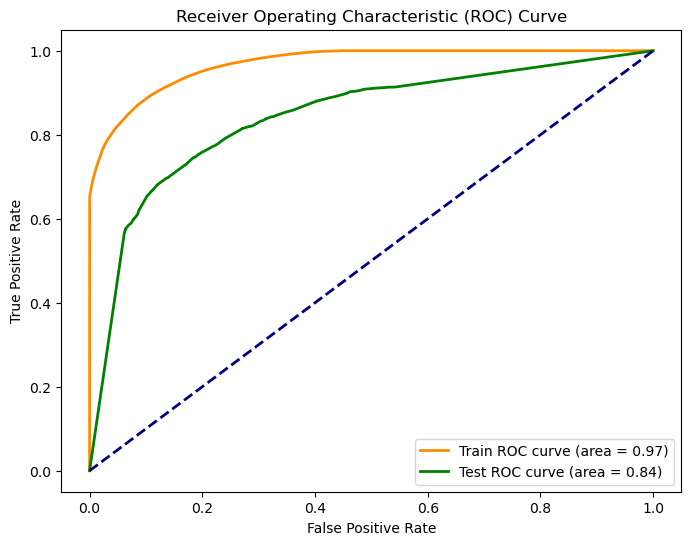


Tuned Decision Tree Evaluation:
{'train_accuracy': 0.89273604590506, 'test_accuracy': 0.7815260289419282, 'train_precision': 0.9083020743887558, 'test_precision': 0.765521523178808, 'train_recall': 0.8736741436271953, 'test_recall': 0.7562870578613781, 'train_f1': 0.8906516585052403, 'test_f1': 0.7608762727553224, 'train_conf_matrix': array([[20975,  2029],
       [ 2906, 20098]], dtype=int64), 'test_conf_matrix': array([[4618, 1133],
       [1192, 3699]], dtype=int64), 'train_report_summary': {'precision_0': 0.8783133034630041, 'precision_1': 0.9083020743887558, 'recall_0': 0.9117979481829247, 'recall_1': 0.8736741436271953, 'f1_0': 0.8947424549429455, 'f1_1': 0.8906516585052403, 'accuracy': 0.89273604590506}, 'test_report_summary': {'precision_0': 0.7948364888123924, 'precision_1': 0.765521523178808, 'recall_0': 0.8029907842114415, 'recall_1': 0.7562870578613781, 'f1_0': 0.7988928293400225, 'f1_1': 0.7608762727553224, 'accuracy': 0.7815260289419282}}


In [17]:
# Train the models
tuned_dt_model = trainer.tuned_decision_tree()

# Evaluate the models
tuned_dt_results = evaluator.evaluate(tuned_dt_model)


print("\nTuned Decision Tree Evaluation:")
print(tuned_dt_results)


Training Accuracy: 89.27%
Functional Wells (0): Precision 88%, Recall 91%.
Wells Needing Repair (1): Precision 91%, Recall 87%.
Misclassification rate: ~10%.

Test Accuracy: 78.15%
Functional Wells (0): Precision 80%, Recall 80%.
Wells Needing Repair (1): Precision 77%, Recall 76%.
Misclassification rate: ~22%.

#### Insights:
The tuned decision tree model performs well with high accuracy on both the training and test data, achieving a substantial reduction in misclassification compared to the untuned version. The model's performance on the training data is impressive, with high precision and recall for both classes. However, on the test data, the accuracy drops to 78.15%, reflecting some overfitting, though not as severe as the untuned model. The model performs slightly better at identifying functional wells (0), with precision and recall higher than for wells needing repair (1). Fine-tuning the model further could improve performance, especially in balancing precision and recall across both classes.

## Choosing the best Model

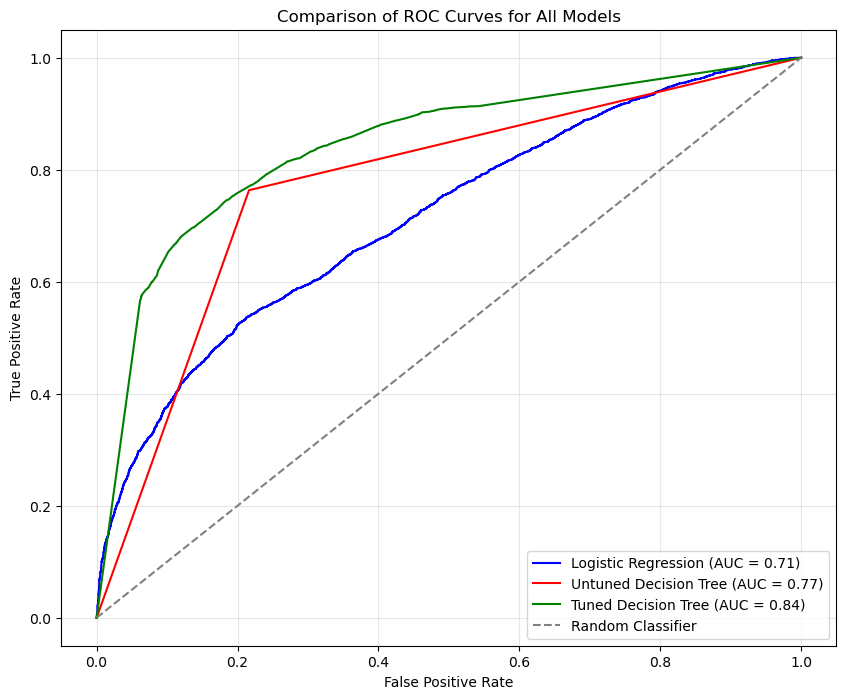

In [26]:
# ROC-AUC Curve for Logistic Regression (Model 1)
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC-AUC Curve for Decision Tree (Untuned Model 2)
fpr_dt, tpr_dt, _ = roc_curve(y_test, untuned_dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ROC-AUC Curve for Tuned Decision Tree (Model 3)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, tuned_dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot all ROC curves on the same graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Untuned Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Decision Tree (AUC = {roc_auc_tuned:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Add plot details
plt.title('Comparison of ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Model 3 (Tuned Decision Tree) is the best model because of its smooth curve and its proximity to the top-left corner, indicating it has the highest overall classification performance.

Model 2 (Untuned Decision Tree) is better than Model 1 (Logistic Regression), but still underperforms compared to the tuned decision tree due to sharp turns in the curve and overfitting signs.

Model 1 (Logistic Regression) is the least effective of the three, but still provides a stable performance, though it's not as well-suited for this problem as the tuned decision tree.

The Tuned Decision Tree (Model 3) should be chosen as the best model based on its ROC curve performance.


## Conclusions

#### 1. Model Performance:
Model 1 (Logistic Regression): Achieved moderate accuracy but struggled with false positives and false negatives. The absence of test_labels for validation hindered model performance assessment.

Model 2 (Untuned Decision Tree): Overfitted on the training data and performed poorly on the test set. test_labels were missing, affecting performance evaluation.

Model 3 (Tuned Decision Tree): Showed improvement in generalization, but again, the lack of test_labels prevented a proper performance evaluation.

##### 2. Class Imbalance:
Class imbalance was effectively managed through a combination of the SMOTE and Class Weights, but the missing test_labels compromised the ability to assess model performance effectively.

#### 3. Test Labels Issue:
The lack of test_labels for the test set prevented reliable evaluation of the models. This needs to be addressed to ensure accurate model assessment moving forward.




## Recommendations

#### 1.Feature Engineering:
Continue with feature engineering, but ensure test_labels are available for evaluating how the new features impact model performance.

#### 2. Additional Data Collection:
Make sure test_labels are included in future data sets, as they are essential for accurate model evaluation and performance tracking.

#### 3. Model Enhancements:
Advanced models like Random Forests or Gradient Boosting Machines should be tested, but ensure proper validation using test_labels.

#### 4. Evaluation Improvements:
Ensure that test_labels are available for all test sets to compute key performance metrics and make informed decisions about model improvements.



## Next Steps

- Deployment: Prepare to deploy the tuned decision tree model once test_labels are included in the testing phase for accurate performance evaluation.
- Iterative Data Collection and Testing: Update datasets with test_labels to ensure proper validation and further model tuning.
- Future Exploration: Explore ensemble methods and ensure test_labels are always available for robust evaluation of model performance.
